<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad4_unidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

housing=fetch_california_housing()

#crear conjuntos de datos de entrenamiento, validacion y prueba
x_train_full, x_test, y_train_full, y_test= train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid= train_test_split(x_train_full, y_train_full)

print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('x_valid: ',x_valid.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)
print('y_valid: ',y_valid.shape)

x_train:  (11610, 8)
x_test:  (5160, 8)
x_valid:  (3870, 8)
y_train:  (11610,)
y_test:  (5160,)
y_valid:  (3870,)


In [6]:
#escalar los datos
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid=scaler.transform(x_valid)

#crear el modelo de la red neuronal
model=keras.models.Sequential([keras.layers.Dense(30, activation='relu',input_shape=x_train.shape[1:]),
                               keras.layers.Dense(1)])

# Compilar el modelo
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])


In [7]:
#Entrenar el modelo
history=model.fit(x_train,y_train,
                  epochs=10,
                  validation_data=(x_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 4s 4ms/step - loss: 1.4483 - root_mean_squared_error: 1.2035 - mean_absolute_percentage_error: 44.8872 - val_loss: 0.5972 - val_root_mean_squared_error: 0.7728 - val_mean_absolute_percentage_error: 34.9779
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5863 - root_mean_squared_error: 0.7657 - mean_absolute_percentage_error: 31.8225 - val_loss: 0.4918 - val_root_mean_squared_error: 0.7013 - val_mean_absolute_percentage_error: 29.5846
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4890 - root_mean_squared_error: 0.6993 - mean_absolute_percentage_error: 28.4556 - val_loss: 0.4484 - val_root_mean_squared_error: 0.6696 - val_mean_absolute_percentage_error: 27.3398
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4616 - root_mean_squared_error: 0.6794 - mean_absolute_percentage_error: 27.0747 - val_loss: 0.4301 - val_root_mean_squared_error: 0.6558 - val_

<Axes: >

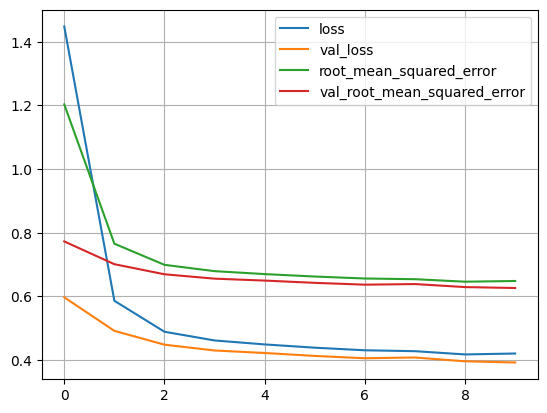

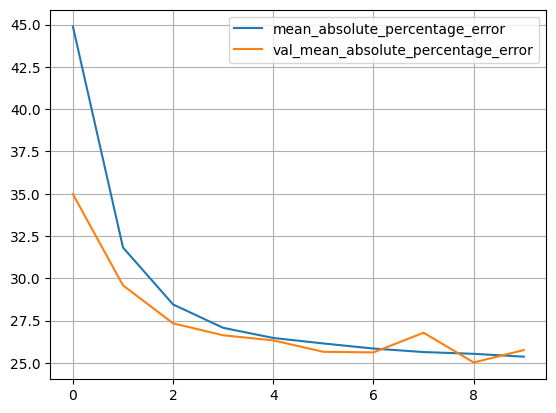

In [10]:
#graficar el historial del esntrenamiento
dfHystory=pd.DataFrame(history.history)
dfHystory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHystory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)

In [12]:
#evaluar el modelo en el conjunto de entrenamiento
loss,RMSE,MAPE= model.evaluate(x_train,y_train)
print('Evaluer el modelo en el conjunto de entrenamiento')
print('Loss train', loss)
print('Root_mean_squared_error train', RMSE)
print('mean_absolute_percentage_error train', MAPE)

#evaluar el modelo en el conjunto de validacion
loss,RMSE,MAPE= model.evaluate(x_valid,y_valid)
print('Evaluer el modelo en el conjunto de validacion')
print('Loss valid', loss)
print('Root_mean_squared_error valid', RMSE)
print('mean_absolute_percentage_error valid', MAPE)

#evaluar el modelo en el conjunto de prueba
loss,RMSE,MAPE= model.evaluate(x_test,y_test)
print('Evaluer el modelo en el conjunto de prueba')
print('Loss test', loss)
print('Root_mean_squared_error test', RMSE)
print('mean_absolute_percentage_error test', MAPE)


363/363 [==============================] - 1s 2ms/step - loss: 0.4054 - root_mean_squared_error: 0.6367 - mean_absolute_percentage_error: 25.4317
Evaluer el modelo en el conjunto de entrenamiento
Loss train 0.4054090678691864
Root_mean_squared_error train 0.6367174386978149
mean_absolute_percentage_error train 25.431686401367188
121/121 [==============================] - 0s 2ms/step - loss: 0.3924 - root_mean_squared_error: 0.6265 - mean_absolute_percentage_error: 25.7608
Evaluer el modelo en el conjunto de validacion
Loss valid 0.39244544506073
Root_mean_squared_error valid 0.6264546513557434
mean_absolute_percentage_error valid 25.760805130004883
162/162 [==============================] - 0s 2ms/step - loss: 0.3945 - root_mean_squared_error: 0.6281 - mean_absolute_percentage_error: 26.1857
Evaluer el modelo en el conjunto de prueba
Loss test 0.3945312201976776
Root_mean_squared_error test 0.6281172037124634
mean_absolute_percentage_error test 26.185665130615234
